In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('Churn_Modelling.csv')

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.shape

(10000, 14)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [46]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [47]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [48]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [49]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [51]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [52]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111, test_size=0.2)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train_scaled

array([[-0.79263521, -1.04547141,  0.68914178, ..., -0.58177669,
         1.75308863, -1.09692743],
       [ 0.65427919, -1.14123686, -0.69259613, ..., -0.58177669,
         1.75308863,  0.91163733],
       [-0.52392254, -1.14123686, -0.69259613, ..., -0.58177669,
        -0.57042182, -1.09692743],
       ...,
       [-1.28872015, -0.47087871, -0.69259613, ...,  1.71887259,
        -0.57042182,  0.91163733],
       [ 0.56126327,  0.48677578, -1.72889956, ..., -0.58177669,
         1.75308863,  0.91163733],
       [ 0.80930573, -0.85394051,  0.34370731, ...,  1.71887259,
        -0.57042182,  0.91163733]])

In [59]:
import tensorflow
from tensorflow import keras
from keras import Sequential, layers
from keras.layers import Dense

In [60]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [63]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.6027 - accuracy: 0.6894 - val_loss: 0.5090 - val_accuracy: 0.7862
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7937 - val_loss: 0.4648 - val_accuracy: 0.7906
Epoch 3/100
200/200 [==============================] - 1s 7ms/step - loss: 0.4389 - accuracy: 0.8122 - val_loss: 0.4402 - val_accuracy: 0.8056
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8252 - val_loss: 0.4204 - val_accuracy: 0.8144
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8381 - val_loss: 0.4063 - val_accuracy: 0.8206
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8439 - val_loss: 0.3959 - val_accuracy: 0.8300
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8502 - val_loss: 0.3868 - val_accuracy: 0.8331

In [64]:
model.layers[1].get_weights()

[array([[ 0.28776857, -1.8054152 ,  0.44741803,  0.6013166 ,  0.5666461 ,
         -0.02423785,  0.18411583, -0.4857435 , -0.7730392 , -0.16889025,
         -0.54470485],
        [ 0.20222782, -0.71916026, -0.11671615, -0.4710653 , -0.29701662,
         -0.17133652,  0.9304757 ,  0.64208305,  0.02013192,  0.4614488 ,
         -0.51761353],
        [-0.26421216, -0.6246741 ,  0.10909672, -0.46780196, -0.29327476,
          0.41440788,  0.22853512, -0.17037974, -0.13212098,  0.63766676,
          0.6825189 ],
        [ 0.32748884, -0.39774695, -0.00853957,  0.42450663,  0.3221204 ,
         -0.44775105, -0.09848922,  0.14068271, -0.97225076,  0.64714295,
          0.69404167],
        [-0.49976736, -0.5559875 , -0.52808875,  0.08954692, -0.7251322 ,
          0.72564924,  0.04849607,  0.29026267,  0.15240638, -0.43572158,
         -0.10641346],
        [-0.12447467, -0.9106524 , -0.1475457 ,  0.40245426,  0.68940467,
         -0.41979277, -0.8334116 ,  0.6747736 ,  1.147375  ,  0.0164146

In [70]:
y_pred = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [72]:
import numpy as np
y_pred = np.where(y_pred > 0.5, 1, 0)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy = accuracy_score(y_pred, y_test)

In [75]:
accuracy

0.869

In [76]:
import matplotlib.pyplot as plt

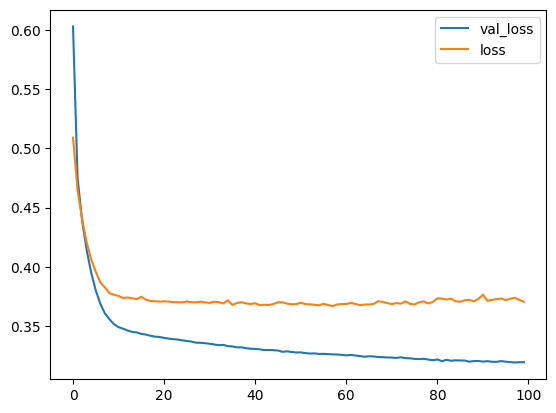

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend({'loss', 'val_loss'})

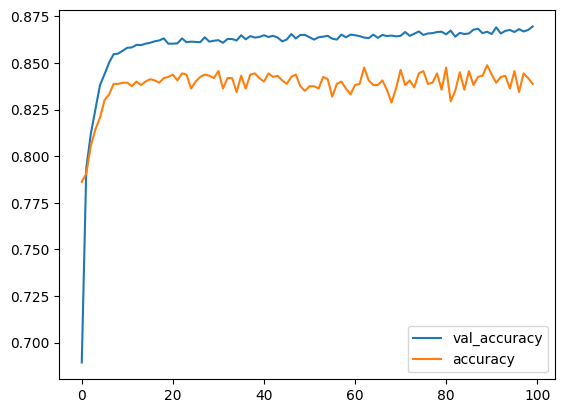

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend({'accuracy', 'val_accuracy'})